# Szeregi czasowe

In [4]:
from pandas import Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Zadanie
Wczytaj dane "Minimum Daily Temperatures Dataset", które podają temperaturę w stopniach celsjuszaw w Australji.

In [5]:
import pandas as pd
series = pd.read_csv('data/daily-minimum-temperatures.csv', index_col = 0, squeeze = True, parse_dates=['Date'])

# Zadanie
Wykonaj Line Plot

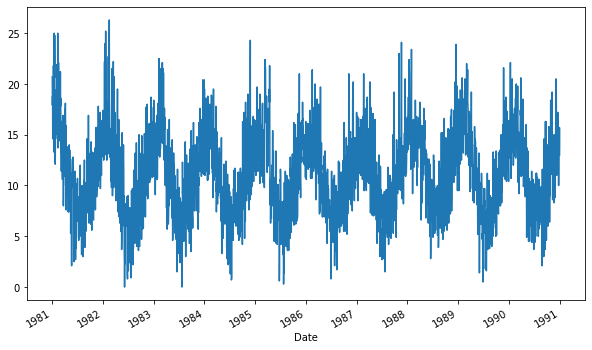

In [6]:
plt.figure(figsize=(10,6));
series.plot()
plt.show()

# lag_plot

Modelowanie szeregów czasowych zakłada związek między daną obserwacją a poprzednią.

Poprzednie obserwacje w szeregu czasowym nazywane są lags (opóźnieniem). Obserwacja w poprzednim kroku to lag1, obserwacji  z przed dwóch kroków czasowych to lag2, i tak dalej.

Pandas posiada specjalny typ wykresu umożliwiający zbadanie zależności między obserwacją a opóźnieniem - lag_plot.

Sporządza ona wykres obserwacji w czasie t na osi x i obserwacji lag1 (t-1) na osi y.
- Jeśli punkty skupiają się wzdłuż linii przekątnej od lewego dolnego rogu do górnego prawego rogu wykresu, sugeruje ona dodatnią korelacyjne.
- Jeśli punkty skupiają się wzdłuż przekątnej od górnego lewego do prawego dolnego to sugeruje to ujemną korelacje.
Im bardziej obserwacje przylegają do przekątnej tym silniejsza relacja, a im bardziej są one rozproszone tym słabsza.


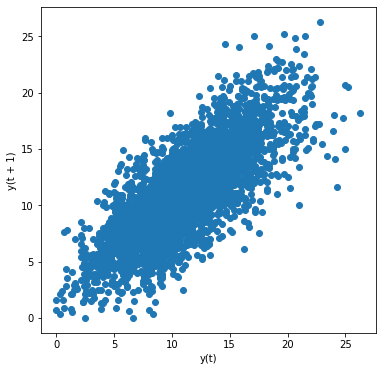

In [7]:
# from pandas.tools.plotting import lag_plot
from pandas.plotting import lag_plot
plt.figure(figsize=(6,6));
lag_plot(series)
plt.show()

Możemy narysować relację dla różnych wartości

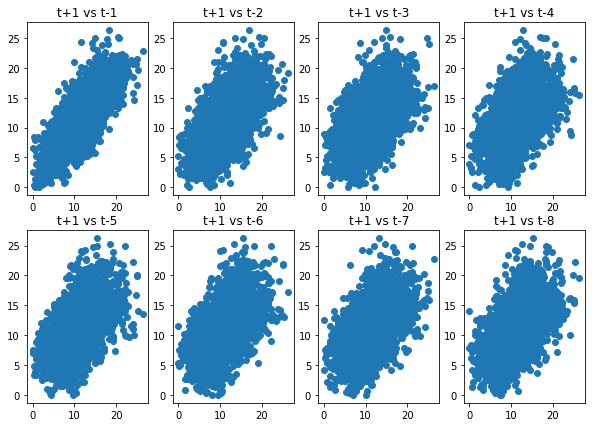

In [8]:
plt.figure(figsize=(10,7));
values = pd.DataFrame(series.values)
lags = 8
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)
for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t+1 vs t-' + str(i))
    plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
plt.show()

# Zad

Narysuj 
```python
lag_plot
```
dla 

  * lag=150
  * lag=365

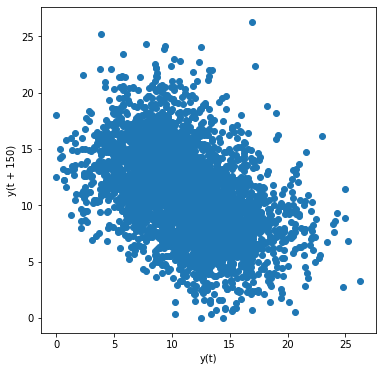

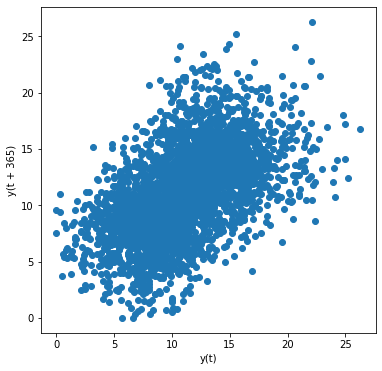

In [9]:
plt.figure(figsize=(6,6))
lag_plot(series,150)
plt.show()
plt.figure(figsize=(6,6))
lag_plot(series,365)
plt.show()

# Autocorrelation

Możemy ocenić siłę i rodzaj zależności pomiędzy obserwacjami a ich lags (opóźnieniami).

W statystyce nazywa się to korelacją, a kiedy obliczane są wartości opóźnień w szeregach czasowych, nazywa się autokorelacją.
Wartość korelacji obliczona między dwiema grupami liczb, takimi jak obserwacje i ich wartościami lag1, daje liczbę między -1 i 1. 

Znak liczby wskazuje odpowiednio ujemną lub dodatnią korelację. Wartość bliska zeru sugeruje słabą korelację, podczas gdy wartość bliżej -1 lub 1 wskazuje na silną korelację.

Wartości korelacji, zwane współczynnikami korelacji, można obliczyć dla każdej obserwacji i różnych wartości opóźnienia. Po obliczeniu można utworzyć wykres, aby lepiej zrozumieć, jak relacja ta zmienia się wraz ze wzrostem opóźnienia.


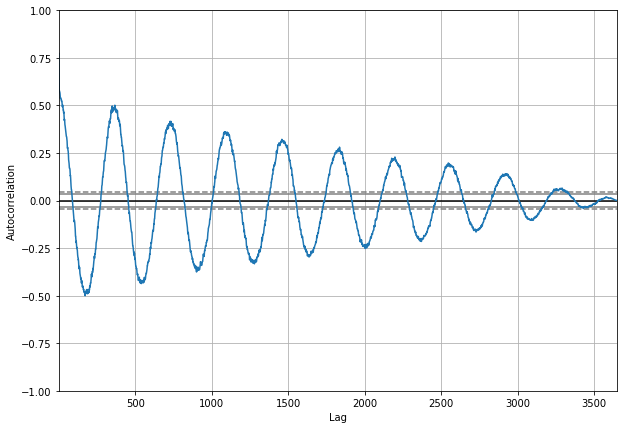

In [10]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10,7));
autocorrelation_plot(series)
plt.show()

# Zadanie 1
Policz wartość autokorelacji dla lag = 500

In [11]:
lag = 500
s = series.values
sk = np.sum((s[:-lag]-np.mean(s))*(s[lag:]-np.mean(s)))/len(s)
so = np.var(s)
r = sk/so
print(r)

-0.3054105419798752


In [37]:
import scipy.stats as stats
print(stats.pearsonr(s[lag:], s[:-lag]))
series.autocorr(500)/len(s)*(len(s[lag:])-49)

(-0.3580466018338694, 8.050128896137705e-96)


-0.304148169037929

3147

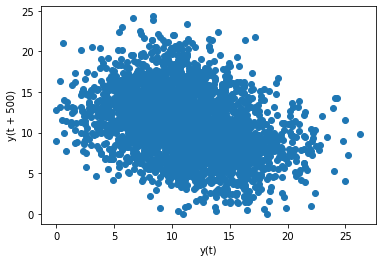

In [53]:
lag_plot(series,500)

Otrzymana wykres przedstawia opóźnienie wzdłuż osi x i korelację na osi y. Przerywane linie wskazują obszar krytyczny, powyżej tego obszaru korelacje są statystycznie znaczące.

Widzimy, że dla naszego zestawu danych mamy cykle silnej ujemnej i pozytywnej korelacji. Ujmuje oznaczają związek obserwacji w przeciwnych porach roku. Fale sinusoidalne, jak widać w tym przykładzie, są mocnym znakiem sezonowości w zestawie danych.


# Zadanie 2
Załaduj dane AirPassengers.csv, sporządź wykres wartości od czasu oraz wykres autokorelacji.

In [39]:
import pandas as pd
data = pd.read_csv('data/AirPassengers.csv', index_col = 'Month', squeeze = True, parse_dates=['Month'])
print(data.head())

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64


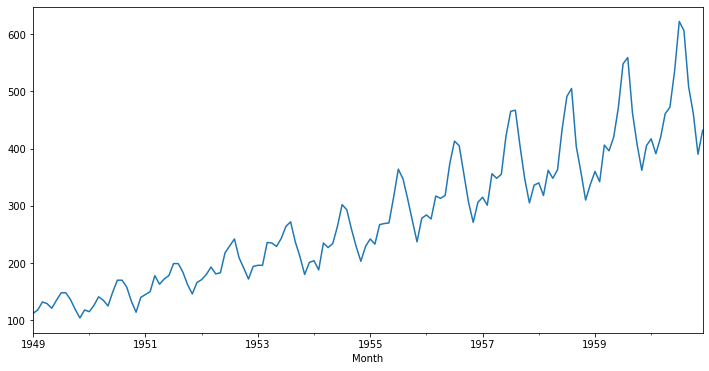

In [40]:
plt.figure(figsize=(12,6));
data.loc['1949':].plot()
plt.show()

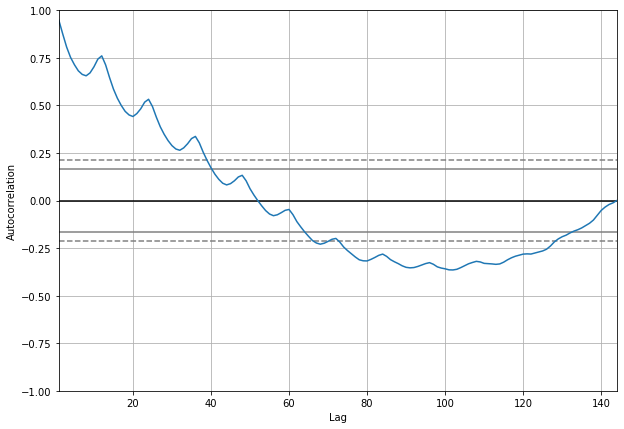

In [52]:
plt.figure(figsize=(10,7))
autocorrelation_plot(data)
plt.show()

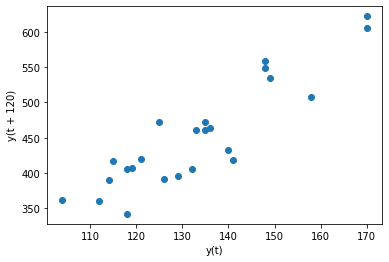

In [51]:
lag_plot(data,120)

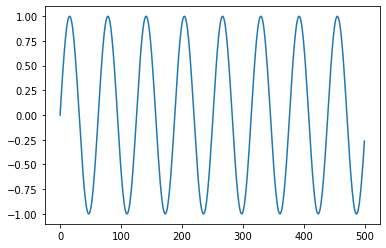

In [42]:
y = np.sin(np.linspace(0,50,500))
plt.plot(y)

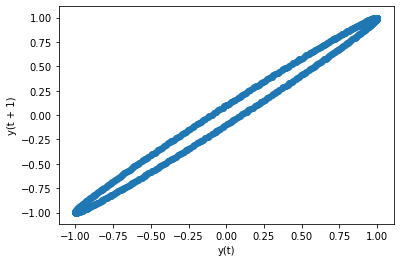

In [48]:
lag_plot(pd.Series(y),1)

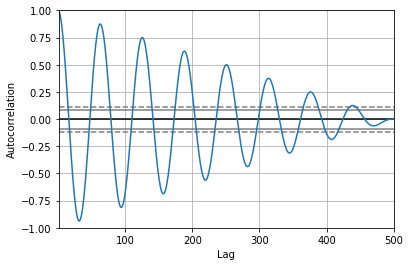

In [29]:
autocorrelation_plot(y)